### Import Libraries

In [1]:
import pandas as pd # Dataset operations
import numpy as np # math and array operations
import scipy.linalg as la
import matplotlib.pyplot as plt

### Import Dataset
Import dataset with the following columns:
- Propierties
- Units
- Max or Min Criteria
- Next columns are for each material with its properties values

In [2]:
df = pd.read_excel("Materiales.xlsx")
df.head()

,Propiedad,Unidades,Criterio,PP,LDPE,HDPE,N6
0,Esfuerzo fluencia,Mpa,Max,41.40,78.000,38.00,79.00
1,Módulo de elasticidad,Gpa,Max,1.77,0.380,1.50,2.90
2,Densidad,g/cm^3,Min,0.92,0.925,0.96,1.14
3,Absorción de agua,%,Min,0.02,0.015,0.20,1.80
4,Costo de la materia prima,USD/kg,Min,0.97,1.060,0.90,2.10


In [3]:
# List of criterias
criterias = df["Propiedad"].tolist()
criterias

['Esfuerzo fluencia',
 'Módulo de elasticidad',
 'Densidad',
 'Absorción de agua',
 'Costo de la materia prima']

In [4]:
# List of alternatives
alternatives =  df.columns.tolist()[3:]
alternatives

['PP', 'LDPE', 'HDPE', 'N6']

In [5]:
# Max or min criterias
maxmin = df["Criterio"].tolist()
maxmin

['Max', 'Max', 'Min', 'Min', 'Min']

# PROMETHEE

### Decisional matrix

In [6]:
df.pop("Unidades") # Deleta Units column
df.pop("Criterio") # Delete max-min criteria colum
df.pop("Propiedad")# Delete properties column
df

,PP,LDPE,HDPE,N6
0,41.40,78.000,38.00,79.00
1,1.77,0.380,1.50,2.90
2,0.92,0.925,0.96,1.14
3,0.02,0.015,0.20,1.80
4,0.97,1.060,0.90,2.10


In [7]:
df_decisional = df.T # Transpose dataframe
df_decisional.columns = criterias # Change name of the columns
df_decisional

,Esfuerzo fluencia,Módulo de elasticidad,Densidad,Absorción de agua,Costo de la materia prima
PP,41.4,1.77,0.920,0.020,0.97
LDPE,78.0,0.38,0.925,0.015,1.06
HDPE,38.0,1.50,0.960,0.200,0.90
N6,79.0,2.90,1.140,1.800,2.10


In [8]:
np.set_printoptions(suppress=True, precision=3) # Avoid scientific notation in numpy matrix and 3 decimal digits

m_decisional = df_decisional.to_numpy() #Dataframe into numpy matrix
m_decisional

array([[41.4  ,  1.77 ,  0.92 ,  0.02 ,  0.97 ],
       [78.   ,  0.38 ,  0.925,  0.015,  1.06 ],
       [38.   ,  1.5  ,  0.96 ,  0.2  ,  0.9  ],
       [79.   ,  2.9  ,  1.14 ,  1.8  ,  2.1  ]])

### Weights

In [9]:
w = np.zeros(len(criterias)) # Array to save criterias' weight

condition = True # Cndition sum weights = 1
 
while condition:
    
    for i in range(len(criterias)):
        w[i] = float(input("Weight of {}: ".format(criterias[i])))
    
    if np.sum(w) == 1:
        condition = False
    else:
        print(" ")
        print("¡Sum of weights is different to 1, correct the values!")

print(" ")
list(zip(criterias,w))

Weight of Esfuerzo fluencia: 0.1
Weight of Módulo de elasticidad: 0.15
Weight of Densidad: 0.3
Weight of Absorción de agua: 0.1
Weight of Costo de la materia prima: 0.35
 


[('Esfuerzo fluencia', 0.1),
 ('Módulo de elasticidad', 0.15),
 ('Densidad', 0.3),
 ('Absorción de agua', 0.1),
 ('Costo de la materia prima', 0.35)]

### Difference Matrices

In [10]:
m_diff = np.zeros((len(criterias),len(alternatives),len(alternatives))) # Hypermatrix to save the differences altenatives for each criteria

for i in range(len(criterias)):
    print(" ")
    print("\033[1m" + criterias[i] + "\033[0m")
    for j in range(len(alternatives)):
        
        if maxmin[i] == "Max":
            m_diff[i,j,:] = m_decisional[j,i] - m_decisional[:,i]
        else:
            m_diff[i,j,:] = -(m_decisional[j,i] - m_decisional[:,i])
    
    print(m_diff[i])

 
Esfuerzo fluencia
[[  0.  -36.6   3.4 -37.6]
 [ 36.6   0.   40.   -1. ]
 [ -3.4 -40.    0.  -41. ]
 [ 37.6   1.   41.    0. ]]
 
Módulo de elasticidad
[[ 0.    1.39  0.27 -1.13]
 [-1.39  0.   -1.12 -2.52]
 [-0.27  1.12  0.   -1.4 ]
 [ 1.13  2.52  1.4   0.  ]]
 
Densidad
[[-0.     0.005  0.04   0.22 ]
 [-0.005 -0.     0.035  0.215]
 [-0.04  -0.035 -0.     0.18 ]
 [-0.22  -0.215 -0.18  -0.   ]]
 
Absorción de agua
[[-0.    -0.005  0.18   1.78 ]
 [ 0.005 -0.     0.185  1.785]
 [-0.18  -0.185 -0.     1.6  ]
 [-1.78  -1.785 -1.6   -0.   ]]
 
Costo de la materia prima
[[-0.    0.09 -0.07  1.13]
 [-0.09 -0.   -0.16  1.04]
 [ 0.07  0.16 -0.    1.2 ]
 [-1.13 -1.04 -1.2  -0.  ]]


### Preference Functions

In [11]:
# List of preference functions
pref_fun = [
    "Tipo I: Usual",
    "Tipo II: Forma U",
    "Tipo III: Forma V",
    "Tipo IV: Escalonada",
    "Tipo V: Forma V con diferencia",
    "Tipo IV: Gaussiana"
]
list(zip(list(range(1,len(pref_fun)+1)), pref_fun))

[(1, 'Tipo I: Usual'),
 (2, 'Tipo II: Forma U'),
 (3, 'Tipo III: Forma V'),
 (4, 'Tipo IV: Escalonada'),
 (5, 'Tipo V: Forma V con diferencia'),
 (6, 'Tipo IV: Gaussiana')]

In [12]:
def preference_function(matrix,n):
    
    m_fun = np.zeros((len(alternatives),len(alternatives))) # Matrix to save the score based on preference functions
    
    if n == 1: # Tipo I: Usual
        for i in range(len(alternatives)):
            for j in range(len(alternatives)):
                
                if matrix[i,j] <= 0:                    
                    m_fun[i,j] = 0
                else:
                    m_fun[i,j] = 1
    
    if n == 2: # Tipo II: Forma U
        q = float(input("Input the parameter q: "))
        for i in range(len(alternatives)):
            for j in range(len(alternatives)):
                
                if matrix[i,j] <= q:                    
                    m_fun[i,j] = 0
                else:
                    m_fun[i,j] = 1

    if n == 3: # Tipo III: Forma V
        
        p = float(input("Input the parameter p: "))
        
        for i in range(len(alternatives)):
            for j in range(len(alternatives)):
                
                if matrix[i,j] <= 0:                    
                    m_fun[i,j] = 0
                elif matrix[i,j] > p:
                    m_fun[i,j] = 1
                else:
                    m_fun[i,j] = matrix[i,j]/p

    if n == 4: # Tipo IV: Escalonada
        
        q = float(input("Input the parameter q: "))
        p = float(input("Input the parameter p: "))
        
        for i in range(len(alternatives)):
            for j in range(len(alternatives)):
                
                if matrix[i,j] <= q:                    
                    m_fun[i,j] = 0
                elif matrix[i,j] > p:
                    m_fun[i,j] = 1
                else:
                    m_fun[i,j] = 0.5
                    
    if n == 5: # Tipo V: Forma V con diferencia
        
        q = float(input("Input the parameter q: "))
        p = float(input("Input the parameter p: "))
        
        for i in range(len(alternatives)):
            for j in range(len(alternatives)):
                
                if matrix[i,j] <= q:                    
                    m_fun[i,j] = 0
                elif matrix[i,j] > p:
                    m_fun[i,j] = 1
                else:
                    m_fun[i,j] = (matrix[i,j]-q)/(p-q)
    
    if n == 6: # Tipo V: Gaussiana
        q = input("Do you want to use the mean as S parameter?[y/n]: ")
        if q == "y":
            s = sum(sum(abs(matrix)))/(len(alternatives)**2-len(alternatives))
        else:
            s = float(input("Input the parameter s: "))
        for i in range(len(alternatives)):
            for j in range(len(alternatives)):
                
                if matrix[i,j] <= 0:                    
                    m_fun[i,j] = 0
                else:
                    m_fun[i,j] = 1-np.exp(-(matrix[i,j]**2)/(2*s**2))

    return m_fun

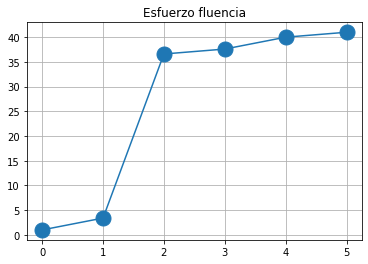

Choose a preference function [1-6]: 2
Preferencie Function for Esfuerzo fluencia -> Tipo II: Forma U
Input the parameter q: 10


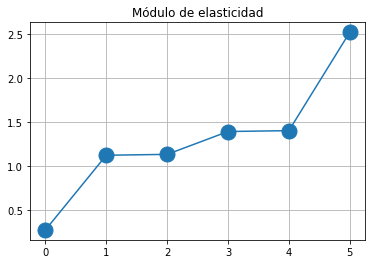

Choose a preference function [1-6]: 4
Preferencie Function for Módulo de elasticidad -> Tipo IV: Escalonada
Input the parameter q: 1
Input the parameter p: 2


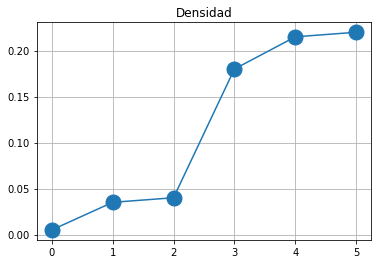

Choose a preference function [1-6]: 5
Preferencie Function for Densidad -> Tipo V: Forma V con diferencia
Input the parameter q: 0.03
Input the parameter p: 0.25


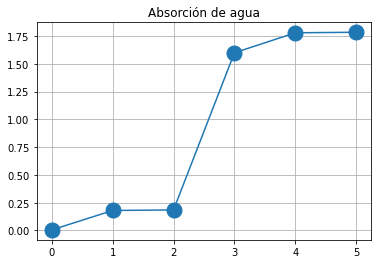

Choose a preference function [1-6]: 3
Preferencie Function for Absorción de agua -> Tipo III: Forma V
Input the parameter p: 1.8


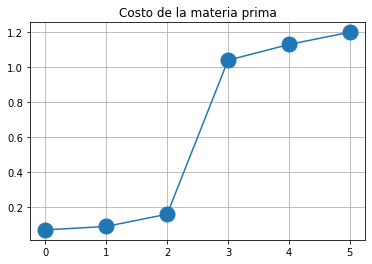

Choose a preference function [1-6]: 6
Preferencie Function for Costo de la materia prima -> Tipo IV: Gaussiana
Do you want to use the mean as S parameter?[y/n]: y


In [13]:
pos = [] # Array to save positive values
m_score = np.zeros((len(criterias),len(alternatives),len(alternatives))) # Hypermatrix to save score basen on preference functions

fun = np.zeros(len(criterias))

for i in range(len(criterias)):
    pos = np.sort(m_diff[i][m_diff[i]>0])
    plt.plot(pos,"o-",markersize = 15)
    plt.grid()
    plt.title("{}".format(criterias[i]))
    plt.show()
    fun[i] = int(input("Choose a preference function [1-6]: "))
    print("Preferencie Function for {} -> {}".format(criterias[i], pref_fun[int(fun[i])-1]))
    m_score[i] = preference_function(m_diff[i],fun[i])

In [14]:
name_fun = []
for i in range(len(criterias)):
    name_fun.append(pref_fun[int(fun[i])-1])
list(zip(criterias,name_fun))

[('Esfuerzo fluencia', 'Tipo II: Forma U'),
 ('Módulo de elasticidad', 'Tipo IV: Escalonada'),
 ('Densidad', 'Tipo V: Forma V con diferencia'),
 ('Absorción de agua', 'Tipo III: Forma V'),
 ('Costo de la materia prima', 'Tipo IV: Gaussiana')]

In [15]:
m_score

array([[[0.   , 0.   , 0.   , 0.   ],
        [1.   , 0.   , 1.   , 0.   ],
        [0.   , 0.   , 0.   , 0.   ],
        [1.   , 0.   , 1.   , 0.   ]],

       [[0.   , 0.5  , 0.   , 0.   ],
        [0.   , 0.   , 0.   , 0.   ],
        [0.   , 0.5  , 0.   , 0.   ],
        [0.5  , 1.   , 0.5  , 0.   ]],

       [[0.   , 0.   , 0.045, 0.864],
        [0.   , 0.   , 0.023, 0.841],
        [0.   , 0.   , 0.   , 0.682],
        [0.   , 0.   , 0.   , 0.   ]],

       [[0.   , 0.   , 0.1  , 0.989],
        [0.003, 0.   , 0.103, 0.992],
        [0.   , 0.   , 0.   , 0.889],
        [0.   , 0.   , 0.   , 0.   ]],

       [[0.   , 0.011, 0.   , 0.815],
        [0.   , 0.   , 0.   , 0.761],
        [0.006, 0.033, 0.   , 0.851],
        [0.   , 0.   , 0.   , 0.   ]]])

### Preferred Aggregate Index

In [16]:
m_IPA = np.zeros((len(alternatives),len(alternatives))) # Matrix to save IPA

for i in range(len(criterias)):
    m_IPA += m_score[i]*w[i]
m_IPA

array([[0.   , 0.079, 0.024, 0.643],
       [0.1  , 0.   , 0.117, 0.618],
       [0.002, 0.087, 0.   , 0.591],
       [0.175, 0.15 , 0.175, 0.   ]])

In [17]:
FS_pos = np.zeros(len(alternatives))
FS_neg = np.zeros(len(alternatives))

for i in range(len(alternatives)):
    FS_pos[i] = sum(m_IPA[i,:])/(len(alternatives)-1)
    FS_neg[i] = sum(m_IPA[:,i])/(len(alternatives)-1)
    
print(FS_pos)
print(FS_neg)

[0.249 0.278 0.227 0.167]
[0.093 0.105 0.105 0.617]


In [18]:
FS_N = FS_pos - FS_neg
FS_N

array([ 0.156,  0.173,  0.121, -0.451])

### Results

In [19]:
# Show it as a Dataframe
df_end = pd.DataFrame(FS_N)
df_end.insert(0, "Material", alternatives)
df_end.columns = ["Material","FS_N"]
df_end

,Material,FS_N
0,PP,0.156032
1,LDPE,0.173222
2,HDPE,0.121483
3,N6,-0.450737


In [20]:
df_end = df_end.sort_values(by=["FS_N"], ascending = False)
df_end.insert(0, "Ranking", list(range(1,len(alternatives)+1)))
df_end

,Ranking,Material,FS_N
1,1,LDPE,0.173222
0,2,PP,0.156032
2,3,HDPE,0.121483
3,4,N6,-0.450737
